# === Cell 1 - Metadata ===

### Course: Signals and Systems — Programming Section (Python)

**Full Name:**  *Sepehr Mahmoudi*

**Student ID:**   *402131033*

**Source:** *Signals and Systems Laboratory with MATLAB*  

**Problem Number (Chapter.section.question_num):** **3.4.10**



# === Cell 2 - Upload & display question image :===



## Problem Statement (Image)
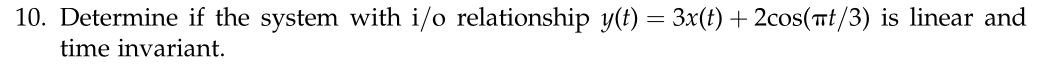

# === Cell 3 - Assumptions & method ===

# Problem Assumptions
- Input signal: x(t)
- Output signal: y(t) = 3x(t) + 2cos(πt/3)
- The system adds a fixed sinusoidal term independent of the input.
- Task: Check linearity and time invariance.
- Note: If the cosine term is removed, the system should be both linear and time-invariant.

# === Cell 4 - Solution Section ===

## Step 1: Define the System and Plot Input Signals
We define:
- High-resolution time axis.
- Rectangular pulse rect(t) and triangular pulse hat(t).
- The system function with a toggle for the cosine term.
  
We also plot rect(t) and hat(t) to visualize the input signals.


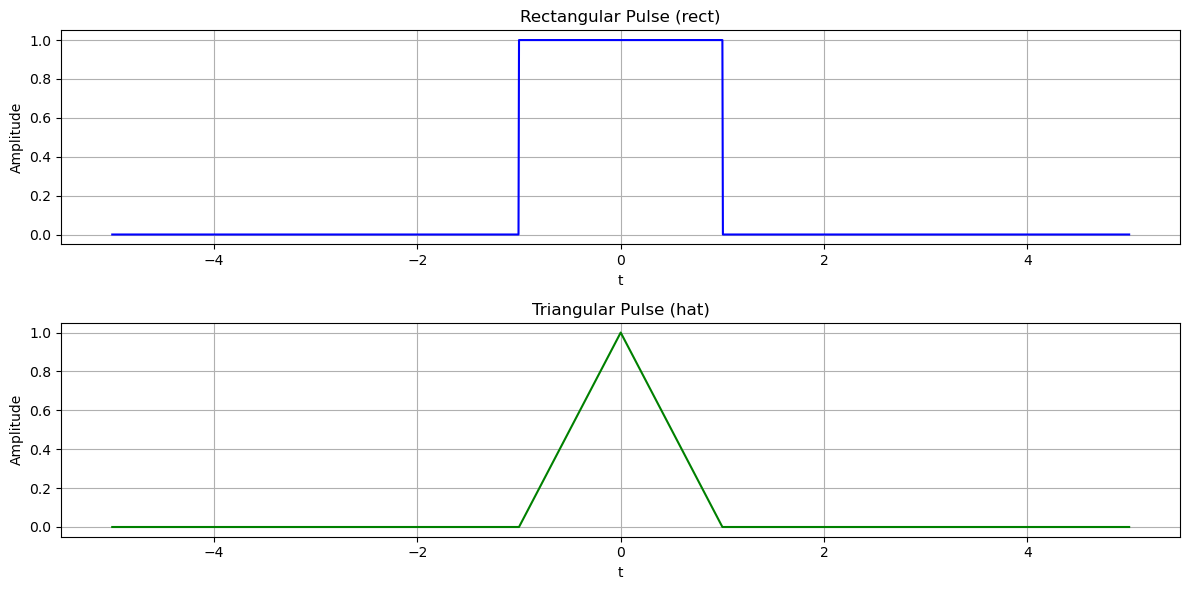

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Time axis
t = np.linspace(-5, 5, 2001)

# Toggle cosine term
USE_COSINE = True   # set to False to test y(t)=3x(t)

def system(x, t):
    """System: y(t) = 3x(t) [+ 2cos(pi t / 3) if enabled]."""
    y = 3*x
    if USE_COSINE:
        y = y + 2*np.cos(np.pi*t/3)
    return y

def rect_pulse(t, width=2.0):
    """Rectangular pulse: 1 for |t| <= width/2, else 0."""
    return np.where(np.abs(t) <= width/2, 1.0, 0.0)

def hat_pulse(t, width=2.0):
    """Triangular pulse: 1 - |t|/(width/2) for |t| <= width/2, else 0."""
    a = width/2
    val = 1.0 - np.abs(t)/a
    return np.where(np.abs(t) <= a, np.maximum(val, 0.0), 0.0)

# Define signals
rect = rect_pulse(t, width=2.0)
hat = hat_pulse(t, width=2.0)

# Plot rect and hat
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(t, rect, color="blue")
plt.title("Rectangular Pulse (rect)")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(t, hat, color="green")
plt.title("Triangular Pulse (hat)")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()

## Step 2: Linearity Test
We test superposition with rect(t) and hat(t).
If the system is linear, y(a*x1 + b*x2) − (a*y1 + b*y2) must be zero.

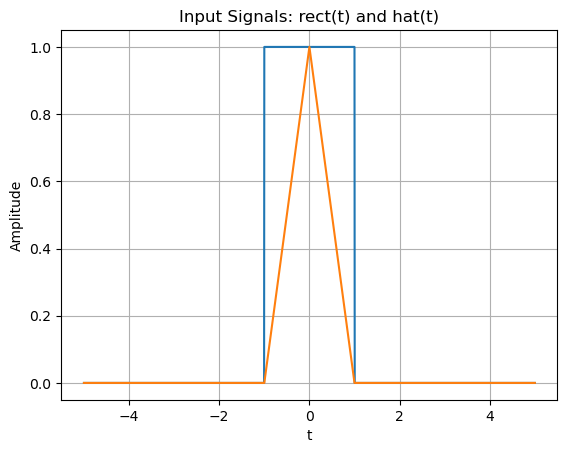

In [6]:
y_rect = system(rect, t)
y_hat = system(hat, t)

# --- Inputs Comparison ---
plt.figure()
plt.plot(t, rect)
plt.plot(t, hat)
plt.title("Input Signals: rect(t) and hat(t)")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

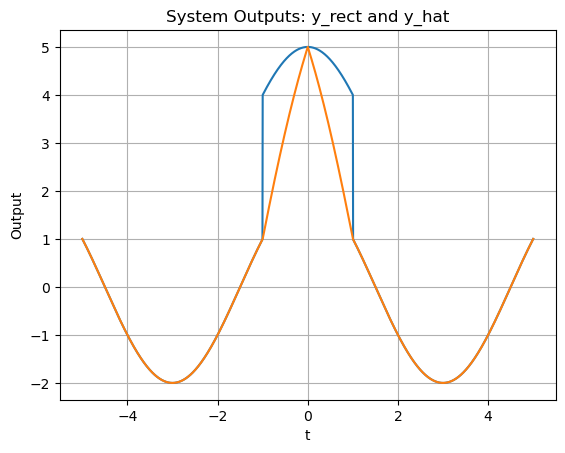

In [7]:
# -------------------------
# Linearity Test
# -------------------------

a, b = 2.0, 3.0

x_comb = a * rect + b * hat
y_comb = system(x_comb, t)
y_expected = a * y_rect + b * y_hat

diff = y_comb - y_expected

# --- Individual Outputs ---
plt.figure()
plt.plot(t, y_rect)
plt.plot(t, y_hat)
plt.title("System Outputs: y_rect and y_hat")
plt.xlabel("t")
plt.ylabel("Output")
plt.grid(True)
plt.show()


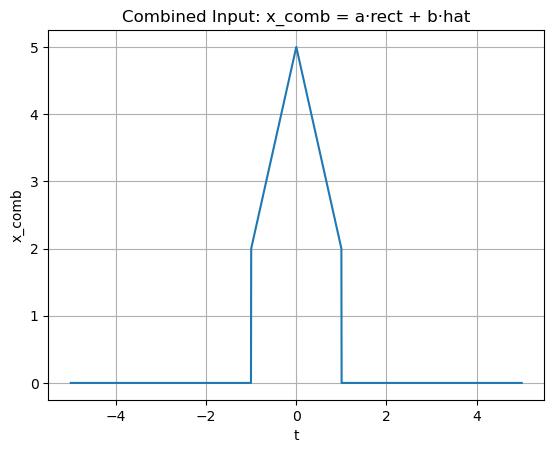

In [8]:
# --- Input Linearity Check ---
plt.figure()
plt.plot(t, x_comb)
plt.title("Combined Input: x_comb = a·rect + b·hat")
plt.xlabel("t")
plt.ylabel("x_comb")
plt.grid(True)
plt.show()

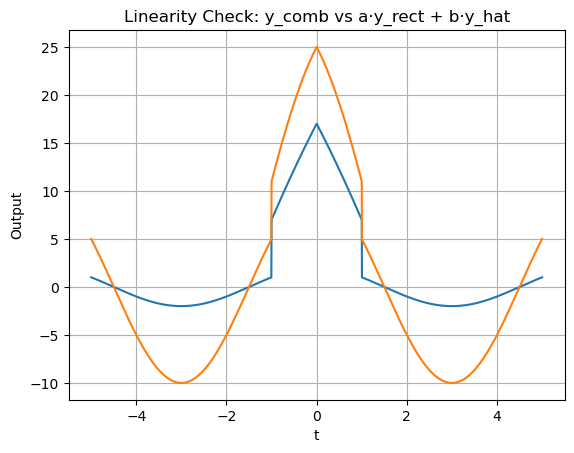

In [9]:
# --- Output Comparison (Core Linearity Visualization) ---
plt.figure()
plt.plot(t, y_comb)
plt.plot(t, y_expected)
plt.title("Linearity Check: y_comb vs a·y_rect + b·y_hat")
plt.xlabel("t")
plt.ylabel("Output")
plt.grid(True)
plt.show()

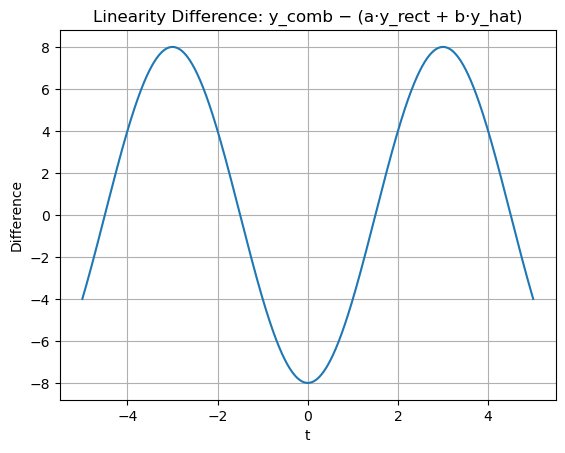

Is system linear? False


In [12]:
# --- Difference Plot (Should be Zero) ---
plt.figure()
plt.plot(t, diff)
plt.title("Linearity Difference: y_comb − (a·y_rect + b·y_hat)")
plt.xlabel("t")
plt.ylabel("Difference")
plt.grid(True)
plt.show()

# =============================
# Numerical Verification
# =============================

is_linear = np.allclose(y_comb, y_expected, atol=1e-10, rtol=1e-10)
print("Is system linear?", is_linear)

## Step 3: Time Invariance Test
We test whether shifting the input rect(t) by t0 results in the output being shifted by the same amount.

In [27]:
def shift_signal(t, s, t0):
    """
    Shift a sampled continuous-time signal s(t) by a time offset t0
    using linear interpolation.

    Parameters
    ----------
    t : ndarray
        Time vector where the signal is sampled.
    s : ndarray
        Sampled signal values corresponding to time vector t.
    t0 : float
        Time shift amount. Positive t0 means delay (shift to the right).

    Returns
    -------
    s_shift : ndarray
        Shifted signal evaluated on the original time grid t.
    valid : ndarray (boolean)
        Boolean mask indicating where interpolation produced valid values.
        Points outside interpolation range are marked False.
    """

    # -------------------------------------------------------------
    # STEP 1: Compute shifted time axis
    # -------------------------------------------------------------
    # To obtain s(t - t0), we evaluate the original signal
    # at time instants (t - t0).
    # This effectively delays the signal by t0.
    t_src = t - t0

    # -------------------------------------------------------------
    # STEP 2: Interpolate signal onto original time grid
    # -------------------------------------------------------------
    # np.interp performs 1D linear interpolation.
    #
    # We evaluate the signal defined at (t_src, s)
    # at the original time grid t.
    #
    # left=np.nan and right=np.nan ensure that values
    # outside the interpolation range are explicitly
    # marked invalid instead of extrapolated.
    s_shift = np.interp(
        t,          # target time grid
        t_src,      # shifted source time grid
        s,          # original signal samples
        left=np.nan,
        right=np.nan
    )

    # -------------------------------------------------------------
    # STEP 3: Determine valid interpolation region
    # -------------------------------------------------------------
    # Interpolation produces NaN outside the overlap region.
    # Valid samples are those that are NOT NaN.
    valid = ~np.isnan(s_shift)

    return s_shift, valid


# ================================================================
# MAIN TIME-INVARIANCE TEST PIPELINE
# ================================================================


# -------------------------------------------------------------
# STEP 4: Define input and compute original output
# -------------------------------------------------------------

# Original input signal x(t)
x = rect

# System response to original input
# y(t) = S{x(t)}
y_original = system(x, t)


# -------------------------------------------------------------
# STEP 5: Define time shift amount
# -------------------------------------------------------------

# Time delay (positive → shift right)
t0 = 1.5


# -------------------------------------------------------------
# STEP 6: Apply shift to input signal
# -------------------------------------------------------------

# x(t - t0)
x_shifted, valid_x = shift_signal(t, x, t0)

# Compute system response to shifted input
# y1(t) = S{x(t - t0)}
y_shifted_input = system(x_shifted, t)


# -------------------------------------------------------------
# STEP 7: Shift original output directly
# -------------------------------------------------------------

# Compute y(t - t0) via interpolation
# y2(t) = shift{ S{x(t)} }
y_shifted_output, valid_y = shift_signal(t, y_original, t0)


# -------------------------------------------------------------
# STEP 8: Determine common valid region
# -------------------------------------------------------------

# We can only compare where BOTH signals are valid.
# This avoids edge artifacts from interpolation.
valid = valid_x & valid_y


# -------------------------------------------------------------
# STEP 9: Compute time-invariance difference
# -------------------------------------------------------------

# Difference between:
#   S{x(t - t0)}  and  y(t - t0)
diff_time = (
    y_shifted_input[valid]
    - y_shifted_output[valid]
)


# -------------------------------------------------------------
# STEP 10: Numerical noise cleanup
# -------------------------------------------------------------

# Due to floating-point arithmetic and interpolation,
# extremely small values (~1e-15) may appear.
# We suppress values smaller than eps.
diff_time_clean = np.where(
    np.abs(diff_time) < eps,
    0.0,
    diff_time
)

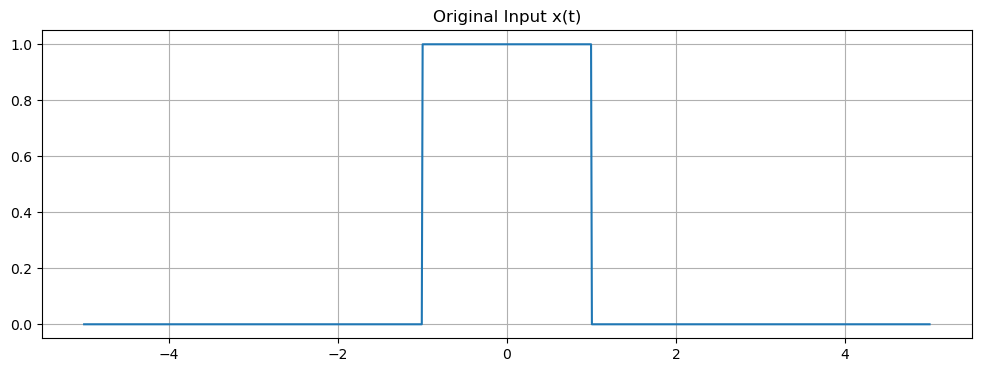

In [28]:
plt.figure(figsize=(12,4))
plt.plot(t, x)
plt.title("Original Input x(t)")
plt.grid(True)
plt.show()

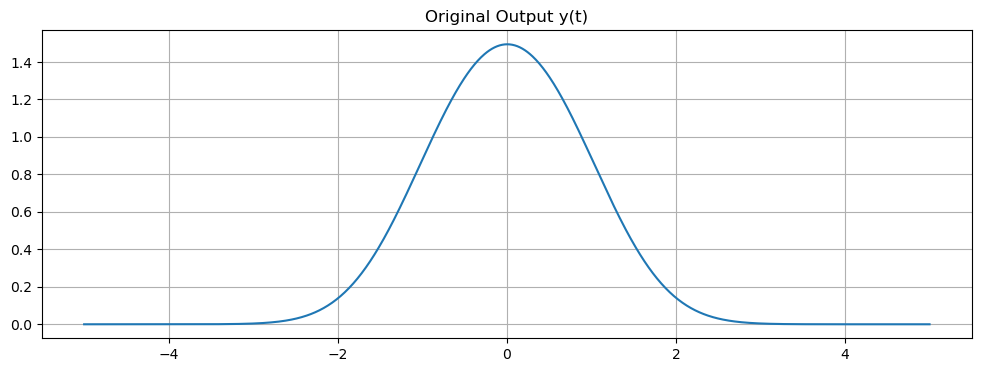

In [29]:
plt.figure(figsize=(12,4))
plt.plot(t, y_original)
plt.title("Original Output y(t)")
plt.grid(True)
plt.show()

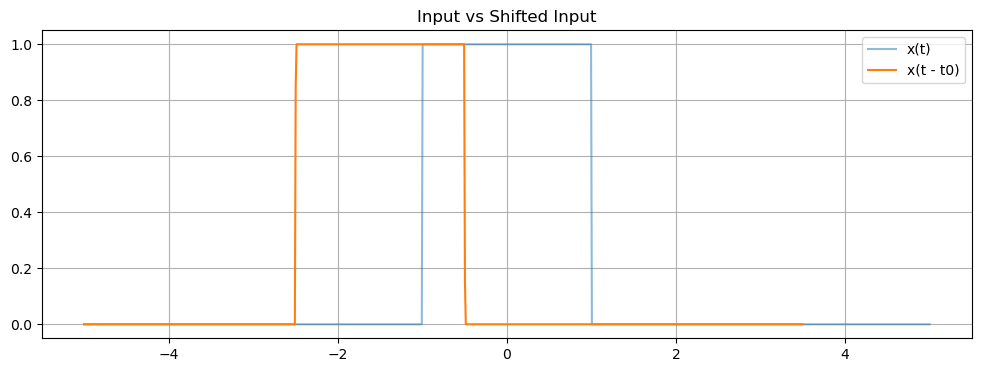

In [30]:
plt.figure(figsize=(12,4))
plt.plot(t, x, label="x(t)", alpha=0.5)
plt.plot(t, x_shifted, label="x(t - t0)")
plt.title("Input vs Shifted Input")
plt.legend()
plt.grid(True)
plt.show()


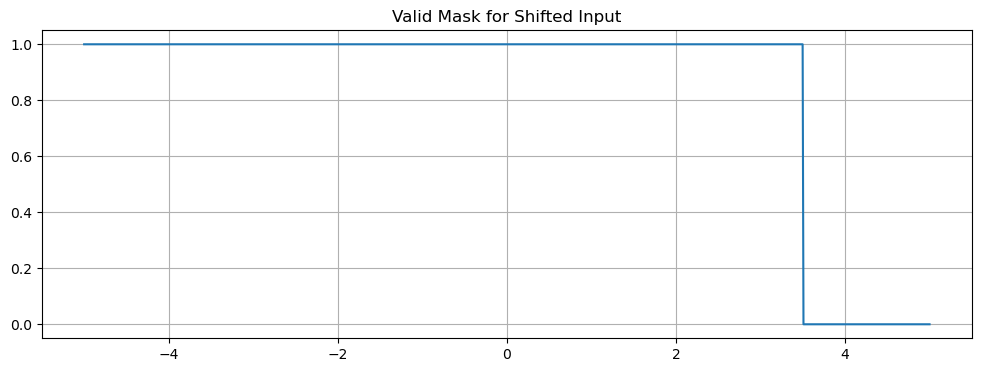

In [31]:
plt.figure(figsize=(12,4))
plt.plot(t, valid_x.astype(int))
plt.title("Valid Mask for Shifted Input")
plt.grid(True)
plt.show()

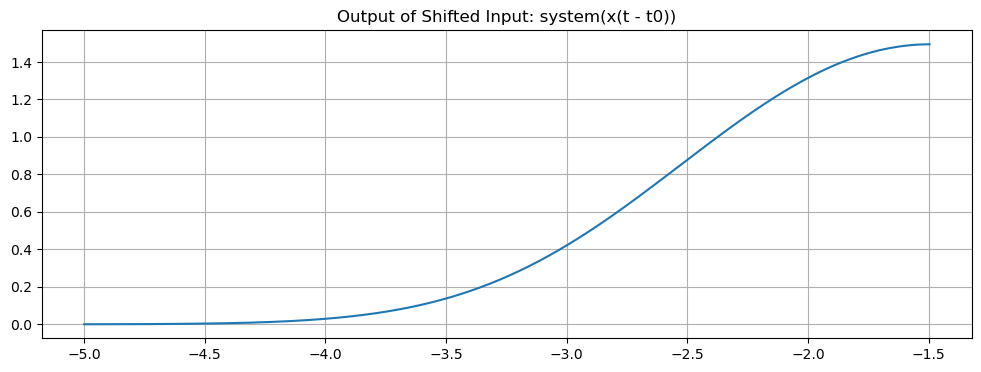

In [32]:
plt.figure(figsize=(12,4))
plt.plot(t, y_shifted_input)
plt.title("Output of Shifted Input: system(x(t - t0))")
plt.grid(True)
plt.show()


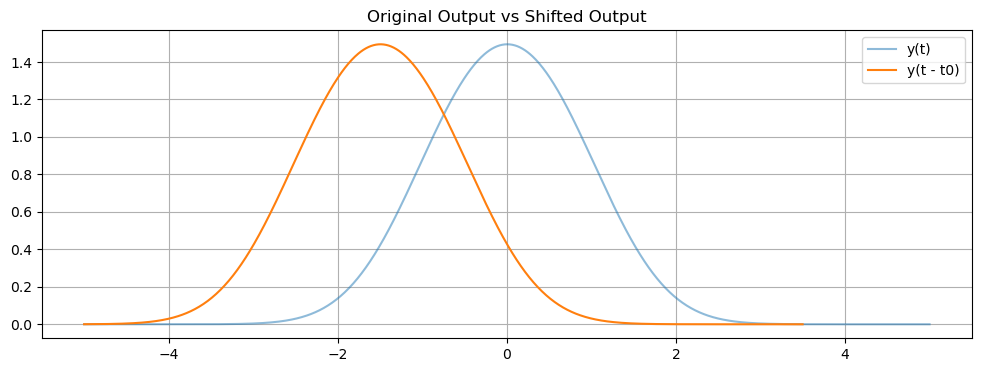

In [33]:
plt.figure(figsize=(12,4))
plt.plot(t, y_original, alpha=0.5, label="y(t)")
plt.plot(t, y_shifted_output, label="y(t - t0)")
plt.title("Original Output vs Shifted Output")
plt.legend()
plt.grid(True)
plt.show()

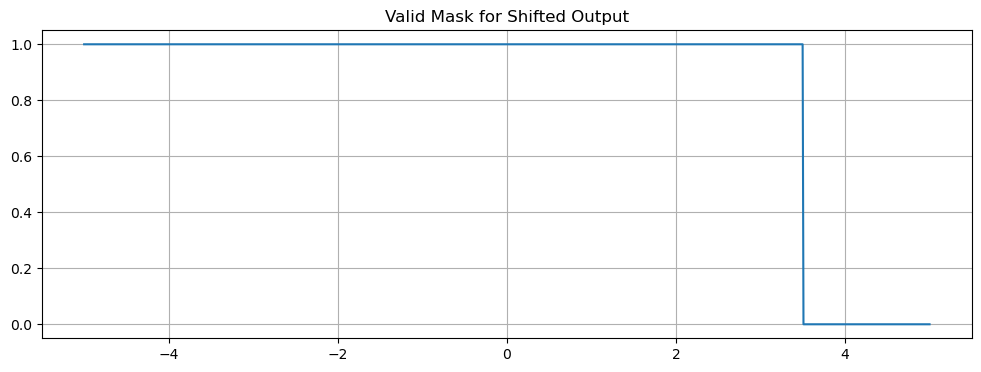

In [34]:
plt.figure(figsize=(12,4))
plt.plot(t, valid_y.astype(int))
plt.title("Valid Mask for Shifted Output")
plt.grid(True)
plt.show()


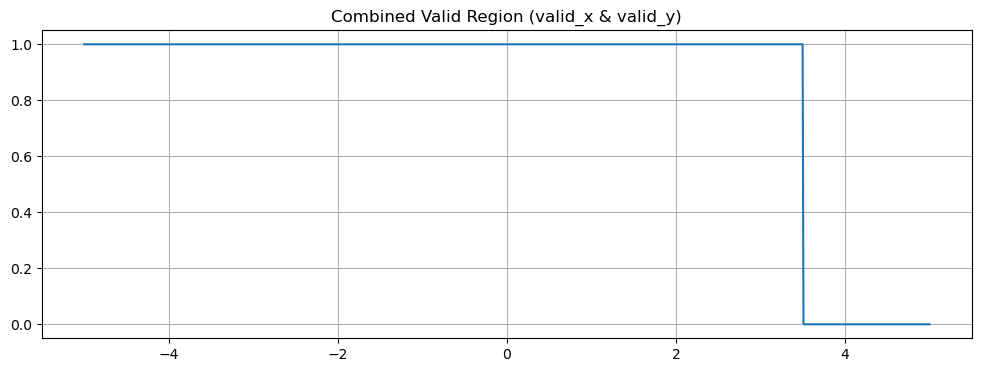

In [35]:
plt.figure(figsize=(12,4))
plt.plot(t, valid.astype(int))
plt.title("Combined Valid Region (valid_x & valid_y)")
plt.grid(True)
plt.show()

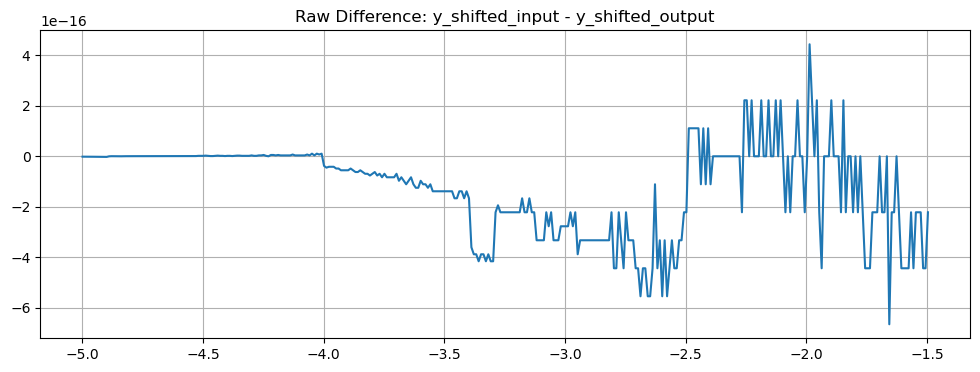

In [36]:
plt.figure(figsize=(12,4))
plt.plot(t[valid], diff_time)
plt.title("Raw Difference: y_shifted_input - y_shifted_output")
plt.grid(True)
plt.show()

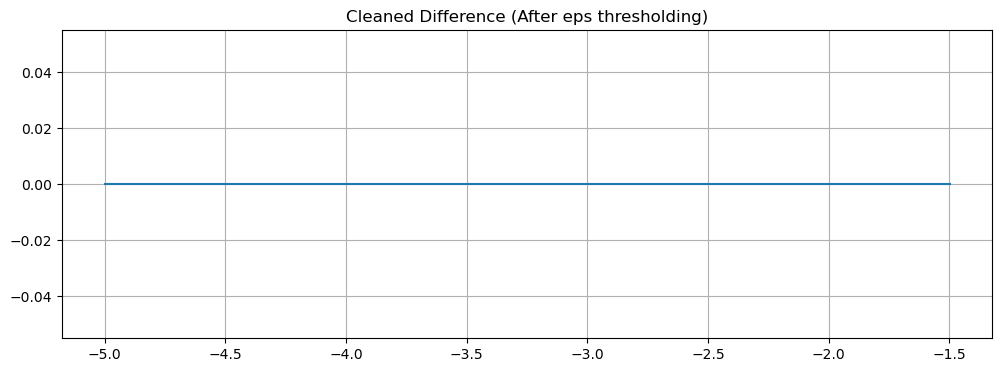

Is system time-invariant? False


In [37]:
plt.figure(figsize=(12,4))
plt.plot(t[valid], diff_time_clean)
plt.title("Cleaned Difference (After eps thresholding)")
plt.grid(True)
plt.show()

print("Is system time-invariant?", np.allclose(y_shifted_input[valid], y_shifted_output[valid], atol=1e-10, rtol=1e-10))

# === cell 5 - Result Analysis ===

# Final Analysis
- Linearity:
  - With cosine term: The system is **non-linear** (difference plot non-zero).
  - Without cosine term: The system is **linear** (difference plot zero).
- Time Invariance:
  - With cosine term: The system is **time-variant** (difference plot sinusoidal).
  - Without cosine term: The system is **time-invariant** (difference plot zero).
